<img style="float: left; margin: 0px 0px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="150px" height="25px" />

 <center> <h1> Modelado y Predicción del Tipo de Cambio Dólar Estadounidense-Peso Mexicano mediante Ajuste de Curvas</h1> </center>

Kevin Emiliano Ayala Montoya 745973

<a href="mailto:kevin.ayala@iteso.mx">Correo institucional</a>

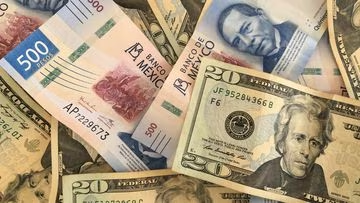

## *Objetivo general*

Desarrollar un modelo predictivo con ajuste de curvas utilizando datos históricos del tipo de cambio dólar-peso mexicano de los últimos 23 meses, con el fin de estimar el valor del tipo de cambio en el presente.

## *Objetivos específicos:*

1. Obtener y preprocesar los datos históricos del precio del dólar-peso mexicano de los últimos 23 meses.
2. Graficar los datos obtenidos.
3. Aplicar la técnica de ajuste de mínimos cuadrados para modelar el comportamiento del tipo de cambio en función del tiempo.
4. Validar el modelo obtenido mediante la comparación de los valores predichos con los datos reales del tipo de cambio en el presente.
5. Evaluar el desempeño del modelo mediante el error cuadrático acumulado.

## *Planteamiento*

Librerias que utilizaremos en todo el proceso:

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd

Se presenta un CSV con los datos históricos mensuales de los últimos 23 meses del tipo de cambio MXN/USA, extraidos de https://mx.investing.com/currencies/usd-mxn-historical-data 

Importamos estos datos usando la función `read_csv` del paquete `pandas`

In [98]:
data = pd.read_csv('Datos históricos USD_MXN.csv')
print(data)

         Fecha   Cierre  Apertura   Máximo   Mínimo  Vol.  % var.
0   01.02.2023  18.3050   18.8480  19.2906  18.2819   NaN  -2.88%
1   01.01.2023  18.8480   19.4866  19.5359  18.5665   NaN  -3.21%
2   01.12.2022  19.4740   19.2680  19.9191  19.1075   NaN   1.16%
3   01.11.2022  19.2510   19.8110  19.8445  19.0403   NaN  -2.74%
4   01.10.2022  19.7940   20.1475  20.1775  19.7805   NaN  -1.72%
5   01.09.2022  20.1400   20.1400  20.5810  19.7518   NaN   0.03%
6   01.08.2022  20.1348   20.3830  20.8335  19.8110   NaN  -1.06%
7   01.07.2022  20.3500   20.1035  21.0566  20.0875   NaN   1.30%
8   01.06.2022  20.0890   19.6574  20.7045  19.4700   NaN   2.22%
9   01.05.2022  19.6525   20.4030  20.5131  19.4125   NaN  -3.72%
10  01.04.2022  20.4110   19.8695  20.6450  19.7255   NaN   2.85%
11  01.03.2022  19.8450   20.4700  21.4687  19.8140   NaN  -3.01%
12  01.02.2022  20.4610   20.6340  20.7915  20.1565   NaN  -0.80%
13  01.01.2022  20.6250   20.4944  20.9134  20.2753   NaN   0.67%
14  01.12.

Como podemos observar en nuestro CSV se nos entregan los datos de manera que la muestra más reciente es la primera de nuestro listado, lo que haremos sera reordenar los elementos de manera que la más antigua quede al comienzo de nuestro listado.

Para esto utilizaremos la `flip` del paquete `numpy`

In [99]:
y = np.flip(data['Cierre'].values)
x = np.array(range(0, 23))

Adémas crearemos un array de 23 elementos que va del 0 al 22 que es correspondiente al número de muestras de la siguiente forma:

<center> $01.04.2021 \rightarrow 0$<center>
<center>$01.02.2023 \rightarrow 22$<center>

Ahora graficaremos...

Text(0, 0.5, 'Cambio $MXN')

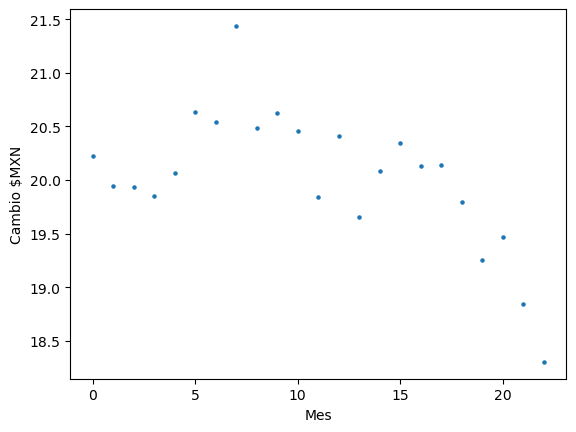

In [100]:
plt.figure()
plt.scatter(x, y, s = 5)
plt.xlabel('Mes')
plt.ylabel('Cambio $MXN')

Primero preparamos nuestros datos para realizar nuestro ajuste de curvas polinomiales.

In [101]:
m = len(y)

`m` es la longitud de la lista `y`

Creamos una matriz de `m` filas y una columna, donde todos los elementos de la matriz son iguales a 1.

In [102]:
ones = np.ones([m, 1])

Creamos matrices de diseño polinomial para cada grado desde 1 hasta 4 utilizando la función `np.reshape` para darle forma a los array. 

In [103]:
x1 = np.reshape(x, [m, 1])
x2 = np.reshape(x**2, [m, 1])
x3 = np.reshape(x**3, [m, 1])
x4 = np.reshape(x**4, [m, 1])

Concatenamos estas matrices de columna junto con una columna de unos, que se utiliza para ajustar el término independiente. 
Así creamos cuatro matrices de diseño, `X1`, `X2`, `X3` y `X4`, que utilizaremos para estimar los coeficientes de primer a cuarto orden.

In [104]:
X1 = np.hstack((ones, x1))
X2 = np.hstack((ones, x1, x2))
X3 = np.hstack((ones, x1, x2, x3))
X4 = np.hstack((ones, x1, x2, x3, x4))

Iniciamos las variables de beta inicial de cada grado, con vectores con coeficientes aleatorios de longitud $n + 1$. Donde `n` es el grado.

In [105]:
beta_inicial1 = np.random.rand(2)
beta_inicial2 = np.random.rand(3)
beta_inicial3 = np.random.rand(4)
beta_inicial4 = np.random.rand(5)
print(beta_inicial4)

[0.84475481 0.11220339 0.73641818 0.51280955 0.46515361]


Trasformamos `y` en una matriz de una columna, y `m` filas.

In [106]:
y_vector = np.reshape(y, [m, 1])

Definimos una función `foo` que toma como argumentos un vector de parámetros beta, una matriz de diseño `X`, y un vector `y`. Esta función realiza la regresión lineal para una matriz de diseño dada utilizando el método de los mínimos cuadrados y devuelve el error cuadrático medio entre las `predicciones` y los valores reales de `y`.

In [107]:
def foo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]

Con la ayuda de de la función `minimize` del módulo `scipy.optimize` vamos a minimizar la función antes definida `foo` (que es la que devuelve el error cuadrático).

Lo que almacenamos en las variables `soli` es la solución óptima que minimiza la función `foo` respecto a la `beta_inicial` de cada grado.

In [108]:
sol1 = opt.minimize(foo, beta_inicial1, args=(X1, y_vector))
sol2 = opt.minimize(foo, beta_inicial2, args=(X2, y_vector))
sol3 = opt.minimize(foo, beta_inicial3, args=(X3, y_vector))
sol4 = opt.minimize(foo, beta_inicial4, args=(X4, y_vector))

Ahora gráfocaremos las soluciones para observalas de una manera más gráfica

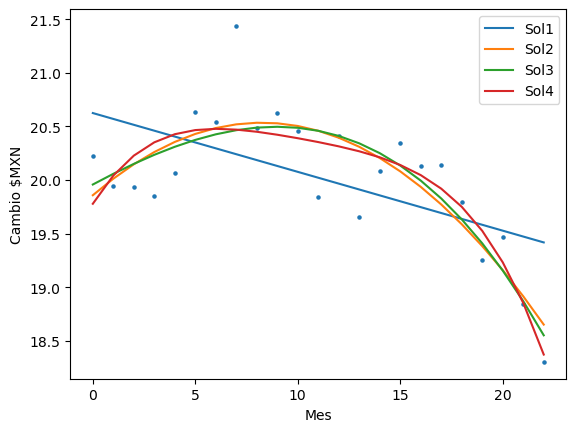

In [109]:
plt.figure()
plt.scatter(x, y, s = 5)
plt.plot(x, X1 @ sol1.x, label = "Sol1") 
plt.plot(x, X2 @ sol2.x, label = "Sol2")
plt.plot(x, X3 @ sol3.x, label = "Sol3")
plt.plot(x, X4 @ sol4.x, label = "Sol4")
plt.xlabel('Mes')
plt.ylabel('Cambio $MXN')
plt.legend()
plt.show()

Para elegir el mejor grado de ajuste polinomial es necesario gráficar el error cuádratico de cada solución:

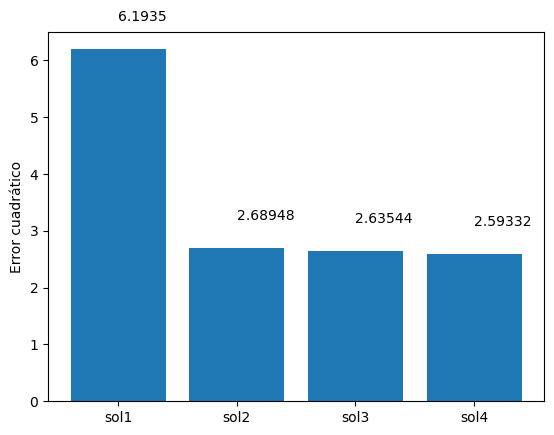

In [110]:
plt.figure()
plt.bar([1, 2, 3, 4], [sol1.fun, sol2.fun, sol3.fun, sol4.fun])
plt.xticks([1, 2, 3, 4], ['sol1', 'sol2', 'sol3', 'sol4'])
plt.ylabel('Error cuadrático')

for i, v in enumerate([sol1.fun, sol2.fun, sol3.fun, sol4.fun]):
    plt.text(i+1, v+0.5, str(round(v, 5)))

Como podemos observar el mejor grado es 4, ya que es el que tiene el minímo error cuadrático.

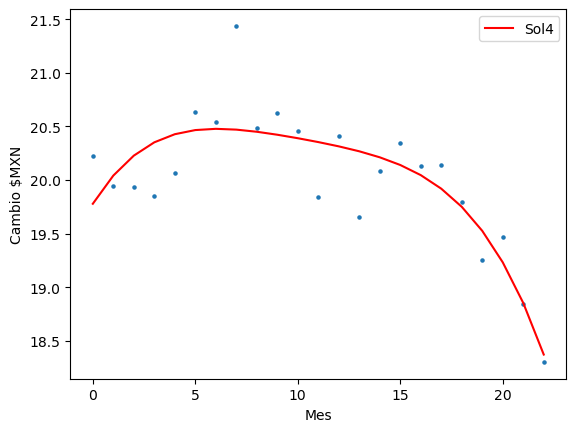

In [111]:
plt.figure()
plt.scatter(x, y, s = 5)
plt.plot(x, X4 @ sol4.x, "r", label = "Sol4")
plt.xlabel('Mes')
plt.ylabel('Cambio $MXN')
plt.legend()
plt.show()

<center> Gráfica que muestra el comportamiento la funcion propuesta<center>

In [112]:
sol4.x

array([ 1.97791481e+01,  3.06598707e-01, -4.67140148e-02,  2.93183819e-03,
       -7.15423100e-05])

Definiremos la función obtenida, pero primero recordaremos:
<center>$f(x) = \beta_0 + \beta_1*x + \beta_2*x^2+ \beta_3*x^3 + \beta_4*x^4$<center>

In [113]:
def f(x):
    return 1.97791454e+01 + 3.06602266e-01*x + -4.67147376e-02*x**2 + 2.93188721e-03*x**3 + -7.15433751e-05*x**4

Una vez declarada la función, la evaluamos en 24, 24 porque teniamos los datos de los ultimos 23 meses y queremos calcular el de este mes, al cual le corresponde el indice 24.

<center> $01.04.2021 \rightarrow 0$<center>
<center>$01.02.2023 \rightarrow 22$<center>
<center>$01.03.2023 \rightarrow 23$<center>

In [114]:
f(23)

17.770403380310896

El dato real nos dice lo siguiente:
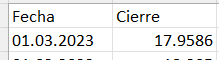

In [115]:
datoreal = 17.9586

error = datoreal - f(23)
error

0.18819661968910495

Y así obtenemos un error entre el dato real y el dato estimado de $0.18816$

In [116]:
print(y)
print(x)

[20.226  19.9461 19.931  19.855  20.063  20.63   20.545  21.4368 20.487
 20.625  20.461  19.845  20.411  19.6525 20.089  20.35   20.1348 20.14
 19.794  19.251  19.474  18.848  18.305 ]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [117]:
xf = np.append(x, 23)
yf = np.append(y, datoreal)

In [118]:
print(yf)
print(xf)

[20.226  19.9461 19.931  19.855  20.063  20.63   20.545  21.4368 20.487
 20.625  20.461  19.845  20.411  19.6525 20.089  20.35   20.1348 20.14
 19.794  19.251  19.474  18.848  18.305  17.9586]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


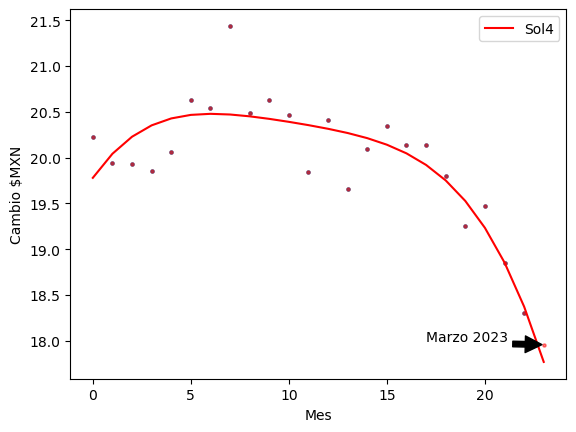

In [120]:
plt.figure()
plt.scatter(x, y, s = 5)
plt.scatter(xf, yf, s = 5, c = 'r', alpha=0.5)
plt.plot(xf, f(xf), "r", label = "Sol4")
plt.annotate('Marzo 2023', xy=(23, datoreal), xytext=(17, 18), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Mes')
plt.ylabel('Cambio $MXN')
plt.legend()
plt.show()

<center> Gráfico que muestra el comportamiento de la gráfica y puntualiza el tipo de cambio actual del dólar <center>

## Conclusiones:

Como podemos observar la medida real de la calculada no está muy lejos, eso significa que hay un error pequeño, como lo calculamos en la gráfica de error pequeño. Como tenemos una muestra de datos de corto plazo (relativamente), solo podemos estimar predicciones a corto plazo, ya que, extraímos una función en este intervalo de datos y como se trata de algo que se ve afectado por muchos factores es muy difícil obtener algo muy preciso.

## Citas bibliográficas:

*Estilos de gráfica y etiquetas | Interactive Chaos. (s. f.). https://interactivechaos.com/es/manual/tutorial-de-matplotlib/estilos-de-grafica-y-etiquetas*

*Histórico Dólar estadounidense/Peso mexicano (USD/MXN) - Investing.com MX. (2023, 6 marzo). Investing.com México. https://mx.investing.com/currencies/usd-mxn-historical-data*